# Composite

## Propósito
O padrão Composite permite compor objetos em estruturas de árvore para então trabalhar com essas estruturas como se fossem objetos individuais.

## Problema
Esse padrão busca solucionar um problema de quando é necessário trabalhar com uma hierarquia de objetos que podem ser simples ou compostos por outros objetos, podendo ter vários níveis de complexidade. O principal desafio é tratar esses objetos da mesma forma, sem a necessidade de diferenciá-los quando realizar operações.

## Solução
Criar uma interface ou classe base comum, que declara métodos que todos os objetos devem implementar. Isso permite que os objetos sejam tratados de maneira uniforme, independente de serem classes mais simples ou estruturas mais complexas.

## Diagrama UML
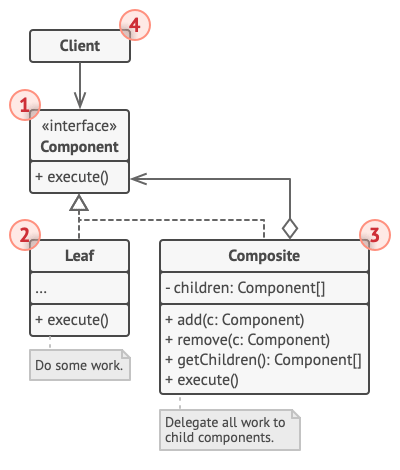

## Exemplo de Implementação do Padrão

O código de exemplo abaixo está em Python, escrito a partir do pseudo-código retirado do site Refactoring Guru, e sua explicação está em forma de comentários:

In [ ]:
# A classe Component é uma interface ou classe abstrata que define a interface comum
# para os objetos e para os componentes compostos (que podem conter outros componentes).
class Component:
    def __init__(self, name):
        self.name = name

    def add(self, component):
        raise NotImplementedError("Este método deve ser implementado nas subclasses.")

    def remove(self, component):
        raise NotImplementedError("Este método deve ser implementado nas subclasses.")

    def display(self, depth):
        raise NotImplementedError("Este método deve ser implementado nas subclasses.")


# A classe Leaf representa um objeto final que não pode conter outros objetos.
# Ela implementa a interface Component, mas os métodos add, remove e display têm comportamento específico para ela.
class Leaf(Component):
    def __init__(self, name):
        super().__init__(name)

    def add(self, component):
        print(f"Não é possível adicionar componentes a uma folha {self.name}.")

    def remove(self, component):
        print(f"Não é possível remover componentes de uma folha {self.name}.")

    def display(self, depth):
        print("-" * depth + self.name)


# A classe Composite é um componente composto, que pode conter outros componentes (tanto folhas quanto outros compostos).
# Ela implementa a interface Component e contém métodos add, remove e display para lidar com seus filhos.
class Composite(Component):
    def __init__(self, name):
        super().__init__(name)
        self.children = []

    def add(self, component):
        self.children.append(component)

    def remove(self, component):
        self.children.remove(component)

    def display(self, depth):
        print("-" * depth + self.name)
        for child in self.children:
            child.display(depth + 2)  # Exibe os filhos com uma indentação maior


# Classe principal que cria a estrutura hierárquica de objetos compostos e folhas.
# O método `main()` demonstra como usar o padrão Composite.
class Application:
    @staticmethod
    def main():
        # Criando folhas (objetos simples que não podem ter filhos)
        leaf1 = Leaf("Leaf 1")
        leaf2 = Leaf("Leaf 2")
        leaf3 = Leaf("Leaf 3")

        # Criando um composto (um objeto que pode ter filhos)
        composite = Composite("Composite 1")
        composite.add(leaf1)
        composite.add(leaf2)

        # Criando outro composto
        composite2 = Composite("Composite 2")
        composite2.add(leaf3)

        # Criando o composto principal, que contém outros compostos e folhas
        root = Composite("Root Composite")
        root.add(composite)
        root.add(composite2)

        # Exibindo a estrutura hierárquica
        root.display(1)

        # Exemplo de remoção e exibição novamente
        print("\nApós remoção de um componente:")
        composite.remove(leaf2)
        root.display(1)